<a href="https://colab.research.google.com/github/golnazads/ColabNotebooks/blob/main/time_series_forecasting_statistical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Followed from this notebook: https://github.com/sujikathir/Intermittent-demand-forecasting/blob/main/README.md

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# load data
df = pd.read_csv('sample_data/test_data_5.csv')

# remove outliers
# Calculate quartiles and IQR to define outlier cutoff
q1 = df['citations'].quantile(0.25)
q3 = df['citations'].quantile(0.75)
iqr = q3 - q1

# Define outliers as >3 * IQR past upper quartile
upper_limit = q3 + (3 * iqr)

# Filter out rows with citations greater than limit
df = df[df['citations'] < upper_limit]

df.head()

,bibcode,year,month,volume,pages,citations,references
0,2010ApJ...708....1P,2010,1,708,8,25,49
2,2010ApJ...708...26R,2010,1,708,12,67,35
3,2010ApJ...708...58C,2010,1,708,13,171,110
4,2010ApJ...708...80M,2010,1,708,13,111,56
5,2010ApJ...708..109B,2010,1,708,8,8,33


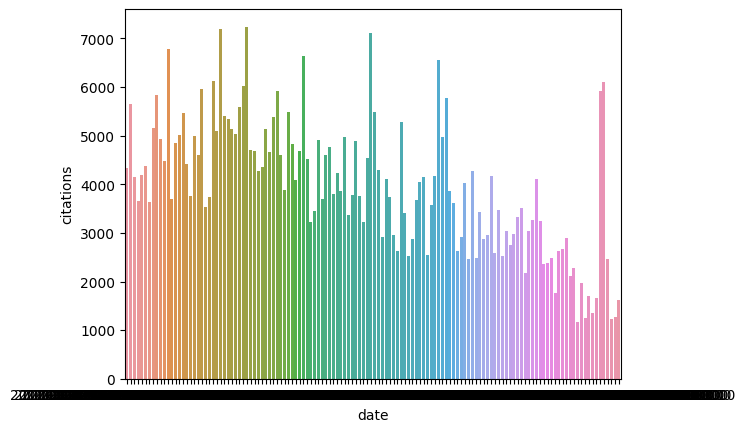

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# aggregate
aggregated = df.groupby(['year','month'])['citations'].sum().reset_index()

# date index
aggregated['date'] = pd.to_datetime(aggregated[['year','month']].assign(day=1))

sns.barplot(x='date', y='citations', data=aggregated)
plt.show()

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go

# aggregate
aggregated = df.groupby(['year','month'])['citations'].sum().reset_index()

# date index
date = pd.to_datetime(aggregated[['year','month']].assign(day=1))

# y
citations = aggregated['citations'].values

new_dataframe=pd.DataFrame(list(zip(date,citations)),columns=['ds','y'])
new_dataframe['ds'] = pd.to_datetime(new_dataframe['ds'])
new_dataframe.head()

# fitting the model & Making forecasts
m = Prophet(changepoint_prior_scale=2.5)
m.fit(new_dataframe)
future = m.make_future_dataframe(12,freq='MS')
forecast = m.predict(future)

print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:len(forecast['yhat']), 'yhat']-new_dataframe['y'])**2)) )

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/6pwicsa9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/86nc8pmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54306', 'data', 'file=/tmp/tmphwlcbalc/6pwicsa9.json', 'init=/tmp/tmphwlcbalc/86nc8pmc.json', 'output', 'file=/tmp/tmphwlcbalc/prophet_modelteajc9bc/prophet_model-20230906214749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 856.927892


In [ ]:
import plotly.offline as py

# making all negative values as zero
x = forecast['yhat']
listed=[]
for i in range(len(x)):
    if x[i] < 0:
        x[i] = 0

py.iplot({"layout": go.Layout(xaxis_title = "Time", yaxis_title = "Sum citations", title = "Prophet Model"),
          "data":[
              go.Scatter(x=new_dataframe['ds'], y=new_dataframe['y'], name='Actual', ),
              go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted'),]})

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go

# aggregate
aggregated = df.groupby(['year','month'])['citations'].mean().reset_index()

# date index
date = pd.to_datetime(aggregated[['year','month']].assign(day=1))

# y
citations = aggregated['citations'].values

new_dataframe=pd.DataFrame(list(zip(date,citations)),columns=['ds','y'])
new_dataframe['ds'] = pd.to_datetime(new_dataframe['ds'])
new_dataframe.head()

# fitting the model & Making forecasts
m = Prophet(changepoint_prior_scale=2.5)
m.fit(new_dataframe)
future = m.make_future_dataframe(12,freq='MS')
forecast = m.predict(future)

print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:len(forecast['yhat']), 'yhat']-new_dataframe['y'])**2)) )

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/gieb1typ.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/uupb2tnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13746', 'data', 'file=/tmp/tmphwlcbalc/gieb1typ.json', 'init=/tmp/tmphwlcbalc/uupb2tnd.json', 'output', 'file=/tmp/tmphwlcbalc/prophet_modeli9l22483/prophet_model-20230906215436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 6.245961


In [ ]:
import plotly.offline as py

# making all negative values as zero
x = forecast['yhat']
listed=[]
for i in range(len(x)):
    if x[i] < 0:
        x[i] = 0

py.iplot({"layout": go.Layout(xaxis_title = "Time", yaxis_title = "Mean Citations", title = "Prophet Model"),
          "data":[
              go.Scatter(x=new_dataframe['ds'], y=new_dataframe['y'], name='Actual', ),
              go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted'),]})

In [ ]:
dff=pd.DataFrame(list(zip(new_dataframe['y'],forecast['yhat'])),columns=['Actual','Predicted'])
dff["MAPE (Mean Absolute Percentage Error)"]=(abs((dff['Actual']-dff['Predicted']))/dff['Actual'])*100

dff = dff.apply (pd.to_numeric, errors='coerce') #To drop NaN values

dff.dropna(inplace=True)

lst=dff['MAPE (Mean Absolute Percentage Error)'].tolist()

for i in range(len(lst)):
    if lst[i] == float('inf'):
        lst[i] = 0

dff['MAPE (Mean Absolute Percentage Error)']=lst
dff

,Actual,Predicted,MAPE (Mean Absolute Percentage Error)
0,56.350649,55.486510,1.533504
1,57.090909,56.211797,1.539846
2,59.314286,54.981356,7.305036
3,48.640000,53.088087,9.144917
4,56.567568,55.577393,1.750428
...,...,...,...
127,79.389610,38.480453,51.529611
128,30.875000,30.300515,1.860679
129,16.280000,24.558323,50.849650
130,17.054054,22.937584,34.499306


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(dff['MAPE (Mean Absolute Percentage Error)'].mean())
print(dff['MAPE (Mean Absolute Percentage Error)'].count())

#calculate RMSE
print(sqrt(mean_squared_error(dff['Actual'],dff['Predicted'])))

10.951279355606607
132
6.245961190744414


A ~10-11% MAPE and RMSE in the single digits indicates the predictions are reasonably accurate.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/qvff7qzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphwlcbalc/ctj3muj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81943', 'data', 'file=/tmp/tmphwlcbalc/qvff7qzo.json', 'init=/tmp/tmphwlcbalc/ctj3muj0.json', 'output', 'file=/tmp/tmphwlcbalc/prophet_modelfigcdeym/prophet_model-20230906215743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


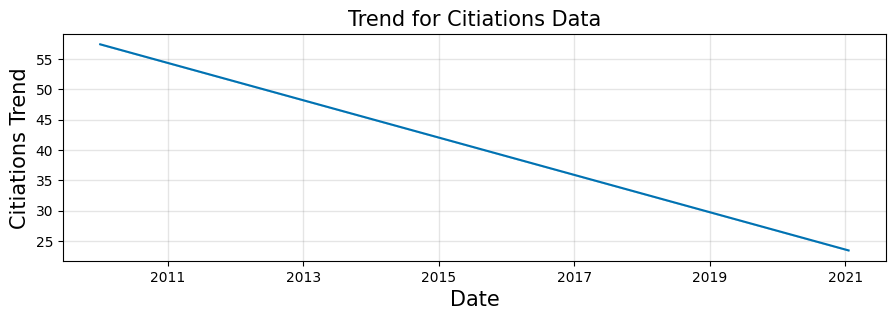

In [ ]:
import matplotlib.pyplot as plt

m = Prophet()
m.fit(new_dataframe)
future = m.make_future_dataframe(periods=49)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for Citiations Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Citiations Trend", fontsize=15)

plt.show()

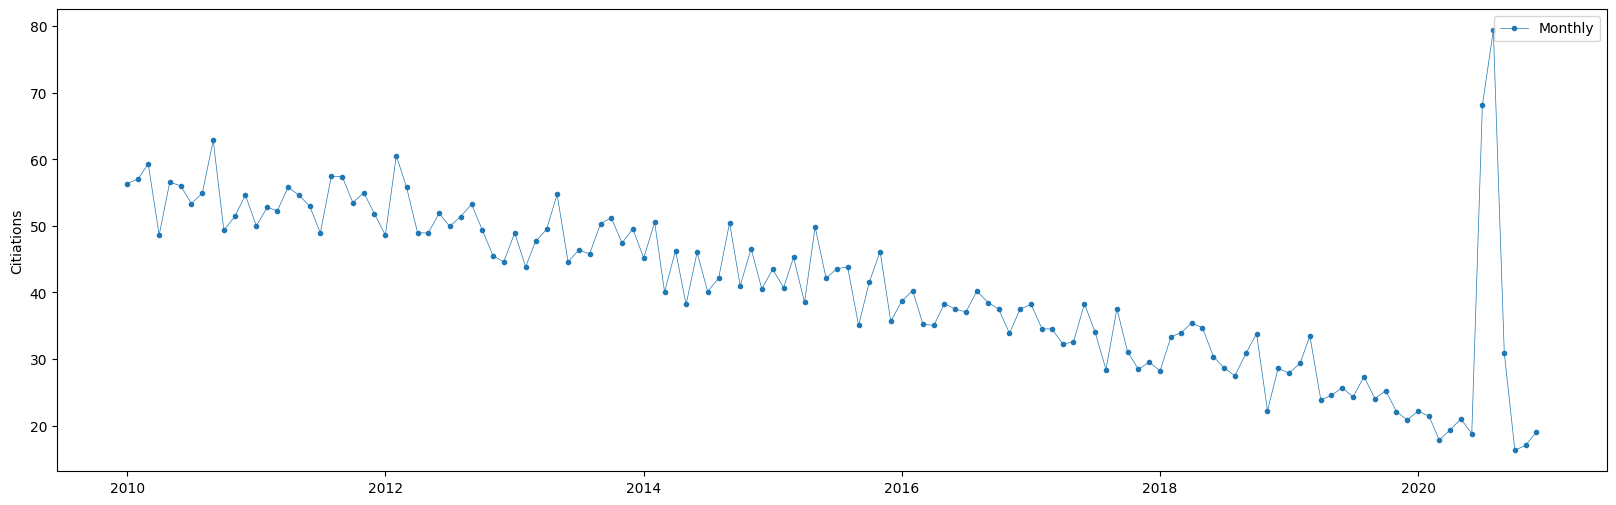

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(new_dataframe['ds'],new_dataframe['y'],marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.set_ylabel('Citiations')
ax.legend();

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

ADF_test(new_dataframe['y'],'raw data')

 > Is the raw data stationary ?
Test statistic = -1.497
P-value = 0.535
Critical values :
	1%: -3.4833462346078936 - The data is not stationary with 99% confidence
	5%: -2.8847655969877666 - The data is not stationary with 95% confidence
	10%: -2.5791564575459813 - The data is not stationary with 90% confidence


So based on this statistical test, we do not have significant evidence to say the raw data is non-stationary. The results are more consistent with the data being stationary, but not to a very strong degree of certainty.

We would want to see a lower test statistic and p-value to be more confident the data is non-stationary. But with these results, the safer conclusion is that the test fails to reject stationarity in the raw data.


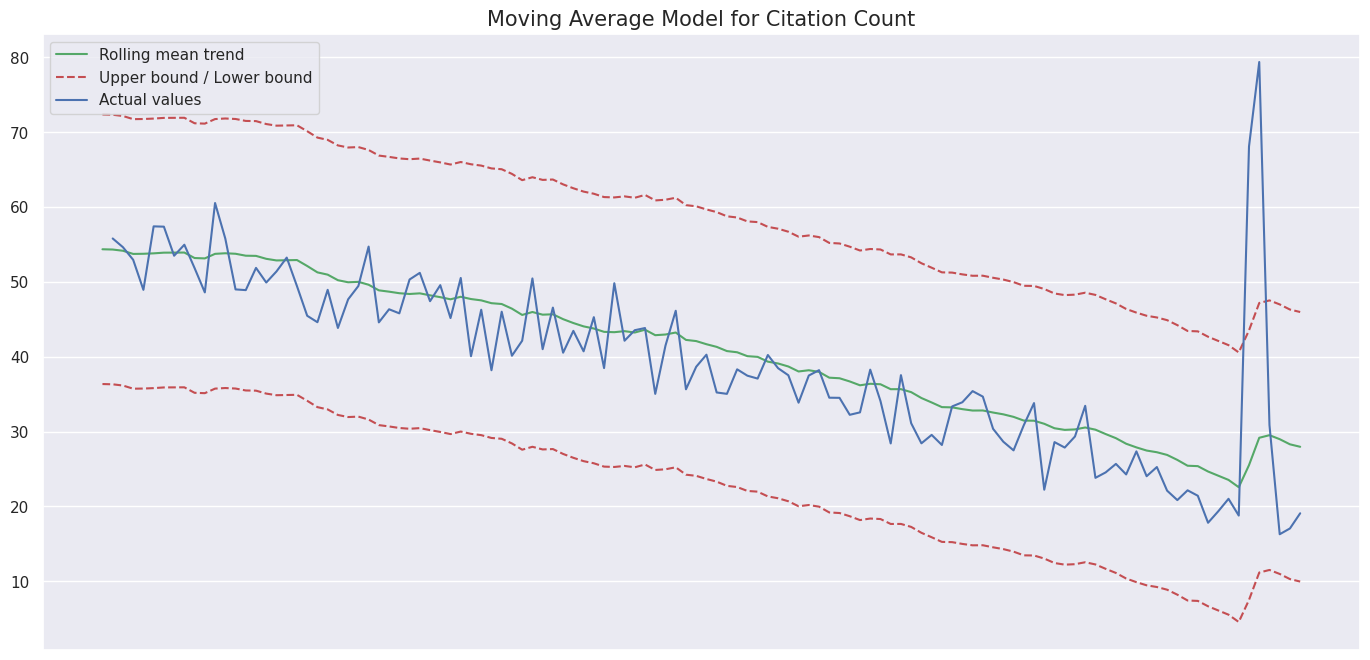

In [ ]:
series = new_dataframe.y
window=15


from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Citation Count',fontsize=15)

plt.plot(rolling_mean, color = green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 1.92 * deviation)
upper_bound = rolling_mean + (mae + 1.92 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')


plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

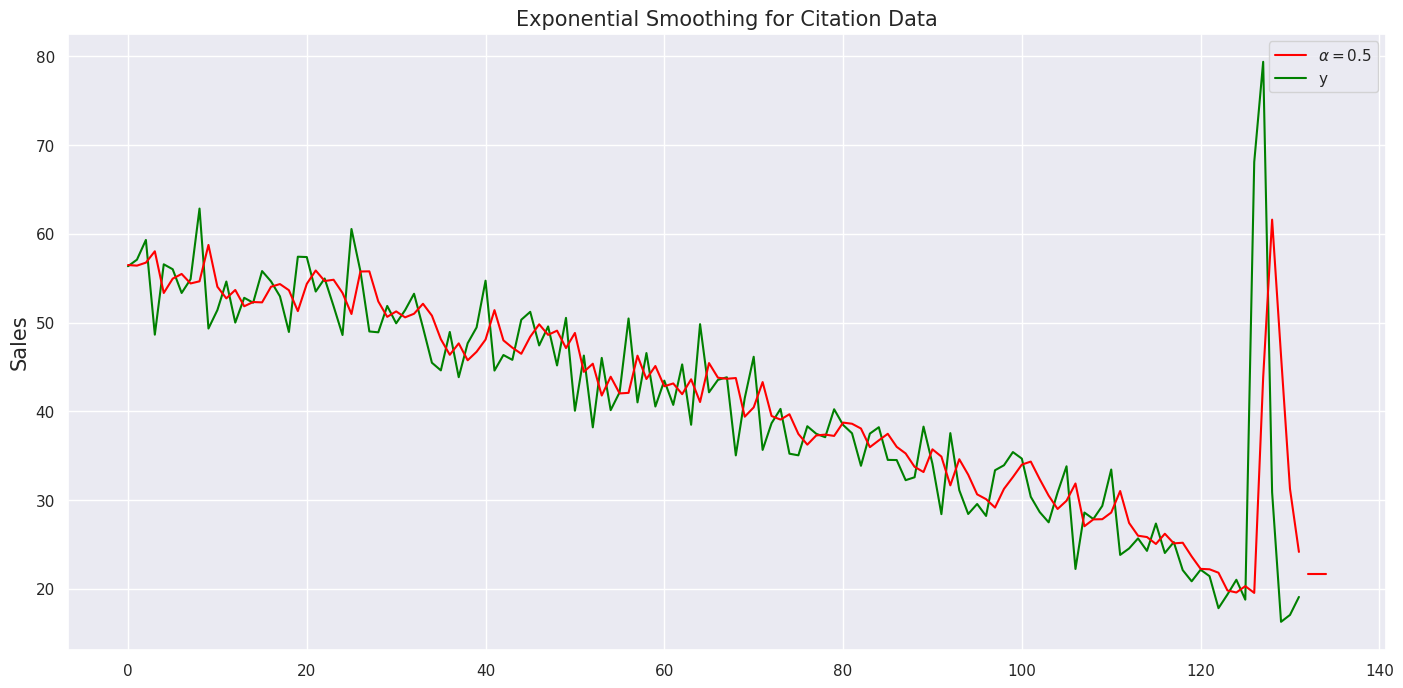

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import pandas as pd

# Put the correct dataframe here!

fit1 = ExponentialSmoothing(new_dataframe['y'][0:200]).fit(smoothing_level=0.9, optimized=False)

fit2 = ExponentialSmoothing(new_dataframe['y'][0:300]).fit(smoothing_level=0.5, optimized=False)

forecast1 = fit1.forecast(3).rename(r'$\alpha=0.9$')
forecast2 = fit2.forecast(3).rename(r'$\alpha=0.5$')
plt.figure(figsize=(17,8))

#forecast1.plot(color='blue', legend=True)
forecast2.plot(color='red', legend=True)
new_dataframe['y'][0:200].plot(marker='',color='green', legend=True)
plt.ylabel("Sales", fontsize=15)

#fit1.fittedvalues.plot(color='blue')
fit2.fittedvalues.plot(color='red')

plt.title("Exponential Smoothing for Citation Data", fontsize=15)
plt.xticks([], minor=True)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

sns.set()

# aggregate
aggregated = df.groupby(['year','month'])['citations'].sum().reset_index()

# date index
date = pd.to_datetime(aggregated[['year','month']].assign(day=1))

# y
citations = aggregated['citations'].values

new_dataframe=pd.DataFrame(list(zip(date,citations)),columns=['ds','y'])
new_dataframe['ds'] = pd.to_datetime(new_dataframe['ds'])
new_dataframe.head()

X = new_dataframe['y'].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]


history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(0,0,1))
	model_fit = model.fit()

	output = model_fit.forecast(steps=1)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
ytest = new_dataframe['ds'][split:]
prd_df = new_dataframe.shift(5, axis = 0)
plt.figure(figsize=(17,8))
py.iplot({"layout": go.Layout(xaxis_title = "Time", yaxis_title = "Sum Citations", title = "ARIMA Model"),
          "data":[
						go.Scatter(x=prd_df['ds'], y=history, name='Actual'),
						go.Scatter(x=prd_df['ds'][split:], y=predictions, name='Predicted')]})

<Figure size 1700x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

sns.set()

# aggregate
aggregated = df.groupby(['year','month'])['citations'].mean().reset_index()

# date index
date = pd.to_datetime(aggregated[['year','month']].assign(day=1))

# y
citations = aggregated['citations'].values

new_dataframe=pd.DataFrame(list(zip(date,citations)),columns=['ds','y'])
new_dataframe['ds'] = pd.to_datetime(new_dataframe['ds'])
new_dataframe.head()

X = new_dataframe['y'].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]


history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(0,0,1))
	model_fit = model.fit()

	output = model_fit.forecast(steps=1)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
ytest = new_dataframe['ds'][split:]
prd_df = new_dataframe.shift(5, axis = 0)
plt.figure(figsize=(17,8))
py.iplot({"layout": go.Layout(xaxis_title = "Time", yaxis_title = "Mean Citations", title = "ARIMA Model"),
          "data":[
            go.Scatter(x=prd_df['ds'], y=history, name='Actual'),
            go.Scatter(x=prd_df['ds'][split:], y=predictions, name='Predicted')]})

<Figure size 1700x800 with 0 Axes>

In [ ]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00


In [ ]:
# Fit auto_arima function
stepwise_fit = auto_arima(new_dataframe['y'], start_p = 1, start_q = 1,
						max_p = 20, max_q = 20, m = 30,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[30] intercept   : AIC=713.080, Time=8.63 sec
 ARIMA(0,0,0)(0,1,0)[30] intercept   : AIC=736.172, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[30] intercept   : AIC=717.933, Time=4.92 sec
 ARIMA(0,0,1)(0,1,1)[30] intercept   : AIC=711.192, Time=3.59 sec
 ARIMA(0,0,0)(0,1,0)[30]             : AIC=792.655, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[30] intercept   : AIC=717.706, Time=1.12 sec
 ARIMA(0,0,1)(1,1,1)[30] intercept   : AIC=712.493, Time=7.10 sec
 ARIMA(0,0,1)(0,1,2)[30] intercept   : AIC=712.407, Time=10.88 sec
 ARIMA(0,0,1)(1,1,0)[30] intercept   : AIC=710.842, Time=3.70 sec
 ARIMA(0,0,1)(2,1,0)[30] intercept   : AIC=712.430, Time=13.00 sec
 ARIMA(0,0,1)(2,1,1)[30] intercept   : AIC=714.398, Time=22.21 sec
 ARIMA(0,0,0)(1,1,0)[30] intercept   : AIC=732.861, Time=1.21 sec
 ARIMA(1,0,1)(1,1,0)[30] intercept   : AIC=712.749, Time=2.76 sec
 ARIMA(0,0,2)(1,1,0)[30] intercept   : AIC=712.741, Time=2.03 sec
 ARIMA(1,0,2)(1,1,0)[30] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 30)   Log Likelihood                -351.421
Date:                             Wed, 06 Sep 2023   AIC                            710.842
Time:                                     22:13:46   BIC                            721.342
Sample:                                          0   HQIC                           715.094
                                             - 132                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -10.9472      2.343     -4.672      0.000     -15.540      -6.355
ma.L1          0.5315      0.057      9.357      0.000       0.420       0.643
ar.S.L30      -0.4027      0.182     -2.207      0.027      -0.760      -0.045
sigma2        54.4586      5.548      9.816      0.000      43.585      65.332
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               932.69
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.92   Skew:                             2.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The aim here was to fit an ARIMA model to a time series dataset in order to forecast future values. The model went through a stepwise search to find the best combination of ARIMA parameters that minimizes the Akaike Information Criterion (AIC).

The best model turned out to be an ARIMA(0,0,1)(1,1,0)[30]. The (0,0,1) indicates there is a moving average (MA) term of order 1. This means the model uses the error from the previous time step to help forecast the current value. The (1,1,0) indicates seasonal autocorrelation at a lag of 30 time periods. So the model is using the value from 30 time steps ago to help forecast the current value. The [30] indicates a seasonal period of 30.

Overall, this model uses the recent error term and the value from 30 time periods ago to help forecast the current value. The AIC of 710 indicates a relatively good fit compared to other models.

The diagnostic tests on the residuals indicate that the errors don't exhibit any autocorrelation (good) but are not normally distributed and have some heteroskedasticity (unequal variance over time).

The conclusion is, the ARIMA(0,0,1)(1,1,0)[30] model seems to fit the data reasonably well and uses recent errors and seasonal lags to help with forecasting. But the model residuals don't perfectly meet the assumptions of normality and equal variance. Overall this appears to be a decent model for this time series data.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split data into train / test sets
train = new_dataframe.iloc[:len(new_dataframe)-12]
test = new_dataframe.iloc[len(new_dataframe)-12:] # set one year(12 months) for testing

model = SARIMAX(train['y'],
				order = (0, 0, 1),
				seasonal_order =(1, 1, 0, 30))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 30)   Log Likelihood                -311.146
Date:                             Wed, 06 Sep 2023   AIC                            628.293
Time:                                     22:20:41   BIC                            635.792
Sample:                                          0   HQIC                           631.317
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3970      0.126      3.148      0.002       0.150       0.644
ar.S.L30       0.3584      0.140      2.561      0.010       0.084       0.633
sigma2        56.1852      9.041      6.215      0.000      38.466      73.905
===================================================================================
Ljung-Box (L1) (Q):                  12.61   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.00   Prob(JB):                         0.86
Heteroskedasticity (H):               1.20   Skew:                             0.05
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model output shows the results of fitting a Seasonal ARIMA (SARIMAX) model to a time series dataset with 120 observations. The goal was to find an appropriate SARIMAX model to forecast future values of the target variable y.

The best model identified was a SARIMAX(0,0,1)(1,1,0)[30]. This means the model contains a moving average (MA) term of order 1, as well as seasonal autocorrelation (AR) at a lag of 30 time periods. The AIC of 628 and BIC of 636 indicate a relatively good model fit compared to other models.

Looking at the model coefficients, the MA(1) term is significant with a value of 0.397, meaning the previous error term is important for predicting the current value of y. The seasonal AR term at lag 30 is also significant at 0.358, indicating the observations 30 time steps ago help explain the current y.

The diagnostic tests on the model residuals provide some useful checks on the model. The Ljung-Box Q-statistic shows evidence of autocorrelation in the residuals, indicating some structure remains unexplained. However, the Jarque-Bera test shows the residuals are likely normally distributed based on the high p-value. Additionally, there is no evidence of heteroskedasticity.

Overall, the SARIMAX(0,0,1)(1,1,0)[30] model appears to capture the short-term MA pattern and longer-term seasonal autocorrelation in the data reasonably well. The model fits better than alternatives, but the residuals show some limitations. With further refinement, forecasting accuracy could potentially be improved.

<Axes: >

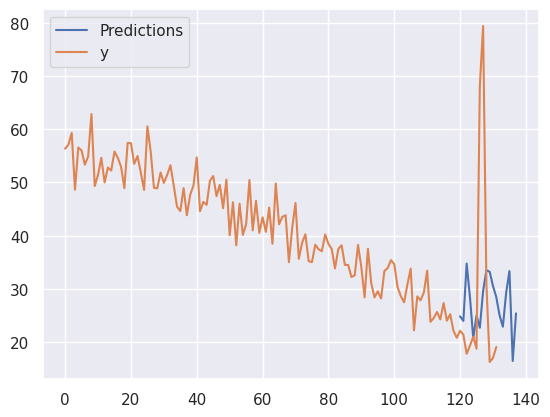

In [ ]:
start = len(train)
end = len(train) + len(test) + 5

# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
new_dataframe['y'].plot(legend = True)


In [ ]:
data = series.values
import pmdarima as pm
stepwise_model = pm.auto_arima(data, start_p=1, start_q=1,
                               max_p=20, max_q=20, m=30,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=inf, Time=4.05 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=750.344, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=744.749, Time=1.28 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=3.12 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=749.500, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=746.429, Time=2.37 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=746.490, Time=1.29 sec
 ARIMA(1,1,0)(0,1,1)[30]             : AIC=745.008, Time=1.04 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=748.372, Time=10.28 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=744.249, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=745.712, Time=1.93 sec
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=745.851, Time=2.73 sec
 ARIMA(0,1,0)(0,1,1)[30]             : AIC=744.503, Time=2.39 sec
 ARIMA(0,1,0)(2,1,1)[30]             : AIC=747.563, Time=12.40 sec
 ARIMA(0,1,1)(1,1,0)[30]             : 